{'alpha': 0.1, 'l1_ratio': 0.1}

Średni błąd kwadratowy naszego modelu dla regresji liniowej wynosi: 27.38
Trafność modelu regresji liniowej: 0.78

Średni błąd kwadratowy naszego modelu dla regresji wielomianowej wynosi: 16.41
Trafność modelu regresji wielomianowej: 0.87

Średni błąd kwadratowy naszego modelu dla regresji grzbietowej wynosi: 27.41
Trafność modelu regresji grzbietowej: 0.78

Średni błąd kwadratowy naszego modelu dla regresji LASSO wynosi: 33.70
Trafność modelu regresji LASSO: 0.73

Średni błąd kwadratowy naszego modelu dla regresji elastycznej siatki wynosi: 35.89
Trafność modelu regresji elastycznej siatki: 0.71

Średni błąd kwadratowy naszego modelu dla regresji grzbietowej przy pomocy regularyzacji wynosi: 27.38
Trafność modelu regresji grzbietowej przy pomocy regularyzacji: 0.78

Średni błąd kwadratowy naszego modelu dla regresji LASSO przy pomocy regularyzacji  wynosi: 28.56
Trafność modelu regresji LASSO przy pomocy regularyzacji: 0.77

Średni błąd kwadratowy nasz

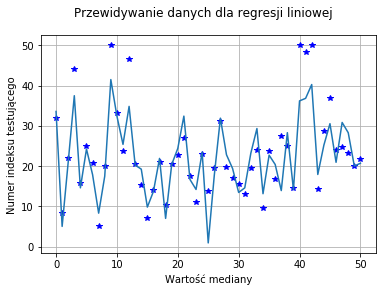

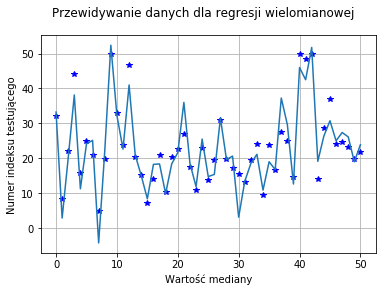

In [5]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

boston_market_data = load_boston()

#Prezentacja danych
#%matplotlib inline
#market_p = pd.DataFrame(boston_market_data.data, \
#            columns=[boston_market_data.feature_names])
#market_p 
#market_p.describe()
#sb.pairplot(market_p, diag_kind="kde")

#Standaryzacja danych
scaler = StandardScaler()
boston_scaled_data = scaler.fit_transform(boston_market_data['data'])

#Załadowanie danych dla regresji liniowych i wielomianowej
boston_train_data, boston_test_data, \
boston_train_target, boston_test_target = \
train_test_split(boston_scaled_data,boston_market_data['target'], test_size=0.1, random_state=1010)

#Utworzenie regresji liniowej
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(boston_train_data, boston_train_target)

#Utworzenie regresji wielomianowej
pt = PolynomialFeatures(2)
lr_forPoly = LinearRegression(normalize = True)
housig_train_poly = pt.fit_transform(boston_train_data) 
housig_test_poly = pt.fit_transform(boston_test_data)
lr_forPoly.fit(housig_train_poly, boston_train_target)

#Utworzenie regresji grzbietowej
ridge = Ridge(alpha=0.5, solver="cholesky")
ridge.fit(boston_train_data,boston_train_target)

#Utworzenie regresji LASSO
lasso = Lasso(alpha=0.5, max_iter=1e5)
lasso.fit(boston_train_data,boston_train_target)

#Utworzenie regresji elastycznej siatki
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=1e5)
elastic.fit(boston_train_data,boston_train_target)

#Wyregulowanie modelu - metoda przeszukiwania siatki
parameters=[{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.9], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.9]}]
model = GridSearchCV(ElasticNet(), parameters, cv=3)
model.fit(boston_train_data,boston_train_target)
print(model.best_params_)
model.best_estimator_

#Utworzenie regresji grzbietowej przy pomocy regularyzacji
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(boston_train_data,boston_train_target)

#Utworzenie regresji LASSO przy pomocy regularyzacji
lasso_reg = Lasso(alpha=0.1, max_iter=1e5)
lasso_reg.fit(boston_train_data,boston_train_target)

#Utworzenie regresji elastycznej siatki przy pomocy regularyzacji
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.4, max_iter=1e5)
elastic_reg.fit(boston_train_data,boston_train_target)

########## Sprawdzanie MSSE oraz R2
#Regresja liniowa
print()
print("Średni błąd kwadratowy naszego modelu dla regresji liniowej wynosi: %.2f" % 
mean_squared_error(boston_test_target, linear_regression.predict(boston_test_data)))
print('Trafność modelu regresji liniowej: %.2f' % 
r2_score(boston_test_target, linear_regression.predict(boston_test_data)))

#Regresja wielomianowa
print()
print("Średni błąd kwadratowy naszego modelu dla regresji wielomianowej wynosi: %.2f" % 
mean_squared_error(boston_test_target, lr_forPoly.predict(housig_test_poly)))
print('Trafność modelu regresji wielomianowej: %.2f' % 
r2_score(boston_test_target, lr_forPoly.predict(housig_test_poly)))

#Regresja grzbietowa
print()
print("Średni błąd kwadratowy naszego modelu dla regresji grzbietowej wynosi: %.2f" % 
mean_squared_error(boston_test_target, ridge.predict(boston_test_data)))
print('Trafność modelu regresji grzbietowej: %.2f' % 
r2_score(boston_test_target, ridge.predict(boston_test_data)))

#Regresja LASSO
print()
print("Średni błąd kwadratowy naszego modelu dla regresji LASSO wynosi: %.2f" % 
mean_squared_error(boston_test_target, lasso.predict(boston_test_data)))
print('Trafność modelu regresji LASSO: %.2f' % 
r2_score(boston_test_target, lasso.predict(boston_test_data)))

#Regresja elastycznej siatki
print()
print("Średni błąd kwadratowy naszego modelu dla regresji elastycznej siatki wynosi: %.2f" % 
mean_squared_error(boston_test_target, elastic.predict(boston_test_data)))
print('Trafność modelu regresji elastycznej siatki: %.2f' % 
r2_score(boston_test_target, elastic.predict(boston_test_data)))

#Regresja grzbietowa przy pomocy regularyzacji
print()
print("Średni błąd kwadratowy naszego modelu dla regresji grzbietowej przy pomocy regularyzacji wynosi: %.2f" % 
mean_squared_error(boston_test_target, ridge_reg.predict(boston_test_data)))
print('Trafność modelu regresji grzbietowej przy pomocy regularyzacji: %.2f' % 
r2_score(boston_test_target, ridge_reg.predict(boston_test_data)))

#Regresja LASSO przy pomocy regularyzacji
print()
print("Średni błąd kwadratowy naszego modelu dla regresji LASSO przy pomocy regularyzacji  wynosi: %.2f" % 
mean_squared_error(boston_test_target, lasso_reg.predict(boston_test_data)))
print('Trafność modelu regresji LASSO przy pomocy regularyzacji: %.2f' % 
r2_score(boston_test_target, lasso_reg.predict(boston_test_data)))

#Regresja elastycznej siatki przy pomocy regularyzacji
print()
print("Średni błąd kwadratowy naszego modelu dla regresji elastycznej siatki przy pomocy regularyzacji wynosi: %.2f" % 
mean_squared_error(boston_test_target, elastic_reg.predict(boston_test_data)))
print('Trafność modelu regresji elastycznej siatki przy pomocy regularyzacji: %.2f' % 
r2_score(boston_test_target, elastic_reg.predict(boston_test_data)))

#TEST
print()
print("############")
id = 2
print("    TEST    ")
print("############")

print()
print("Wartosc rzeczywista: " + str(boston_test_target[id]))

linear_regression_prediction = linear_regression.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja liniowa: ")
print("Otrzymalismy: " + str(linear_regression_prediction))

lr_forPoly_pre = lr_forPoly.predict(housig_test_poly[id,:].reshape(1,-1))
print()
print("Regresja wielomianowa: ")
print("Otrzymalismy: " + str(lr_forPoly_pre))

ridge_pre = ridge.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja grzbietowa: ")
print("Otrzymalismy: " + str(ridge_pre))

lasso_pre = lasso.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja LASSO: ")
print("Otrzymalismy: " + str(lasso_pre))

elsatic_pre = elastic.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja elastycznej siatki: ")
print("Otrzymalismy: " + str(elsatic_pre))

ridge_reg_pre = ridge_reg.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja grzbietowa po regularyzacji: ")
print("Otrzymalismy: " + str(ridge_reg_pre))

lasso_reg_pre = lasso_reg.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja LASSO po regularyzacji: ")
print("Otrzymalismy: " + str(lasso_reg_pre))

elastic_reg_pre = elastic_reg.predict(boston_test_data[id,:].reshape(1,-1))
print()
print("Regresja elastycznej siatki po regularyzacji: ")
print("Otrzymalismy: " + str(elastic_reg_pre))

x = []
y = []
y2 = []

for i in range(51):
    x.append(i)
    y.append(boston_test_target[i])
    y2.append(linear_regression.predict(boston_test_data[i].reshape(1,-1)))
    
plt.grid()
plt.plot(x, y, '*b')
plt.plot(x, y2)
plt.suptitle('Przewidywanie danych dla regresji liniowej')
plt.xlabel('Wartość mediany')
plt.ylabel('Numer indeksu testującego')
plt.show()

x = []
y = []
y2 = []

for i in range(51):
    x.append(i)
    y.append(boston_test_target[i])
    y2.append(lr_forPoly.predict(housig_test_poly[i].reshape(1,-1)))
plt.grid()
plt.plot(x, y, '*b')
plt.plot(x, y2)
plt.suptitle('Przewidywanie danych dla regresji wielomianowej')
plt.xlabel('Wartość mediany')
plt.ylabel('Numer indeksu testującego')
plt.show()

